### Importing saved Model from file

In [1]:
import joblib
import os

model_filename = "svm_model.pkl"

# Check if the model file exists
if os.path.isfile(model_filename):
    # Load the saved SVM model from a file
    loaded_model = joblib.load(model_filename)
    print(f"Model loaded from {model_filename}")
else:
    print(f"The model file {model_filename} does not exist. Please train and save the model first.")


Model loaded from svm_model.pkl


C:\Users\sagar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator SGDClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [1]:
import joblib
import os

model_filename = "hashing_vectorizer.pkl"

# Check if the model file exists
if os.path.isfile(model_filename):
    # Load the saved SVM model from a file
    loaded_model = joblib.load(model_filename)
    print(f"Model loaded from {model_filename}")
else:
    print(f"The model file {model_filename} does not exist. Please train and save the model first.")


The model file hashing_vectorizer.pkl does not exist. Please train and save the model first.


### Loading the dataset

In [18]:
import pandas as pd
import numpy as np

# Load the dataset from a CSV file
#df = pd.read_csv('spam_ham_dataset.csv')
df = pd.read_csv('spam_ham_dataset.csv')


### Dropping unnecessary columns

In [3]:
df = df.drop(df.columns[0], axis=1)
df = df.drop("label", axis=1)


### Viewing the dataframe

In [4]:
print(df)

                                                   text  label_num
0     Subject: enron methanol ; meter # : 988291\r\n...          0
1     Subject: hpl nom for january 9 , 2001\r\n( see...          0
2     Subject: neon retreat\r\nho ho ho , we ' re ar...          0
3     Subject: photoshop , windows , office . cheap ...          1
4     Subject: re : indian springs\r\nthis deal is t...          0
...                                                 ...        ...
5166  Subject: put the 10 on the ft\r\nthe transport...          0
5167  Subject: 3 / 4 / 2000 and following noms\r\nhp...          0
5168  Subject: calpine daily gas nomination\r\n>\r\n...          0
5169  Subject: industrial worksheets for august 2000...          0
5170  Subject: important online banking alert\r\ndea...          1

[5171 rows x 2 columns]


### Getting Summary

In [5]:
# Display the first few rows of the dataset
print(df.head())

# Get information about the dataset
print(df.info())

# Get summary statistics
print(df.describe())


                                                text  label_num
0  Subject: enron methanol ; meter # : 988291\r\n...          0
1  Subject: hpl nom for january 9 , 2001\r\n( see...          0
2  Subject: neon retreat\r\nho ho ho , we ' re ar...          0
3  Subject: photoshop , windows , office . cheap ...          1
4  Subject: re : indian springs\r\nthis deal is t...          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5171 non-null   object
 1   label_num  5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB
None
         label_num
count  5171.000000
mean      0.289886
std       0.453753
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000


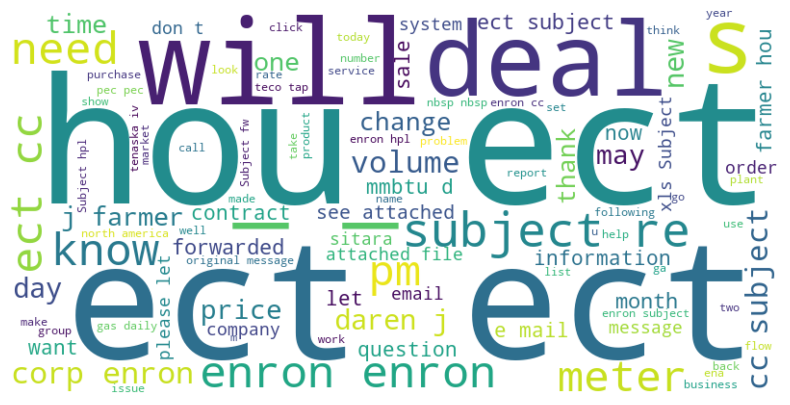

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all email text into a single string
all_text = ' '.join(df['text'])

# Create a WordCloud object with optional settings (e.g., background color, max words)
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()


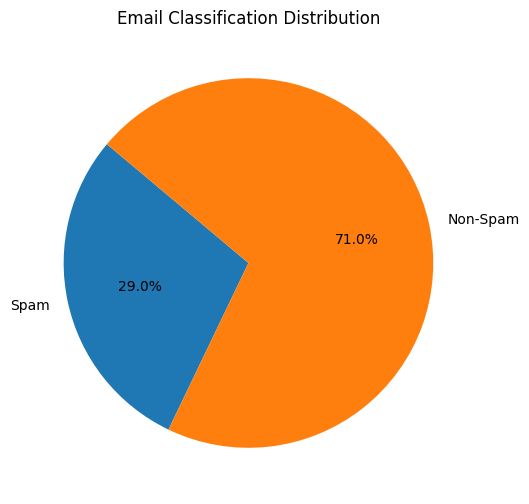

In [7]:
import matplotlib.pyplot as plt

# Count the number of spam and non-spam emails
spam_count = df['label_num'].sum()
non_spam_count = len(df) - spam_count

# Prepare data for the pie chart
labels = ['Spam', 'Non-Spam']
sizes = [spam_count, non_spam_count]

# Create the pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size if needed
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Email Classification Distribution')

# Display the chart
plt.show()


### Assigning feature and labels

In [8]:
# Example assuming 'label' is the target variable and 'feature_column' is a feature
X = df[['text']]
y = df['label_num']


### Fitting and transforming feature set

In [9]:
from sklearn.feature_extraction.text import HashingVectorizer

hashing_vectorizer = HashingVectorizer(stop_words='english')

X = hashing_vectorizer.fit_transform(df['text'])
y = df['label_num']

### Splitting dataset for training and testing

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Using model SVM using SGD

In [11]:
from sklearn.linear_model import SGDClassifier

svm_classifier = SGDClassifier(loss="hinge", alpha=0.001, max_iter=100)


#### Non-Batch Training

In [12]:
svm_classifier = SGDClassifier(loss='hinge', alpha=0.0001, max_iter=100, random_state=42)

# Step 5: Train the classifier
svm_classifier.fit(X_train, y_train)

SGDClassifier(max_iter=100, random_state=42)

#### Batch Training

In [17]:
import numpy as np
import sys

# Define the batch size
batch_size = 32

# Initialize the SGDClassifier
svm_classifier = SGDClassifier(loss='hinge', alpha=0.0001, max_iter=100, random_state=42)
count = 0
# Iterate over mini-batches
for i in range(0, X_train.shape[0], batch_size):
    # Get the current mini-batch
    X_batch = X_train[i:i+batch_size]
    y_batch = y_train.iloc[i:i+batch_size]

    # Update the SVM model with the current mini-batch
    svm_classifier.partial_fit(X_batch, y_batch, classes=[0, 1])

    # Print training progress
    sys.stdout.write("\rTraining progress: {}/{} mini-batches processed".format(i // batch_size + 1, X_train.shape[0] // batch_size +1))
    sys.stdout.flush()
    count = i
    

print("\nModel training complete.")


Training progress: 4100/4136 data points processed
Model training complete.
Test Accuracy: 0.9797101449275363


#### Accuracy Testing

In [13]:
from sklearn.metrics import accuracy_score

y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9903381642512077


### Visualizing Confusion Matrix

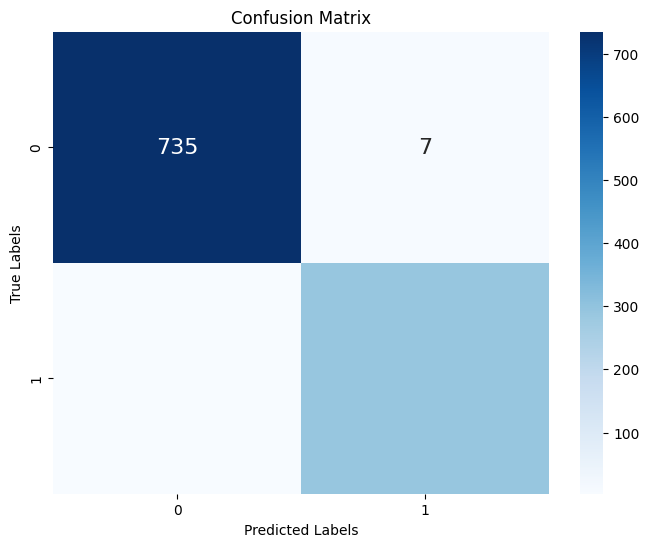

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have predicted labels (y_pred) and true labels (y_true)
# y_pred contains the predicted labels (0 for non-spam, 1 for spam) for your test data
# y_true contains the true labels (0 for non-spam, 1 for spam) for your test data

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


```
              Predicted
              |  Non-Spam (0) |  Spam (1)
Actual   |--------------------------------
Non-Spam |   True Negative  | False Positive
(0)      |--------------------------------
Spam     |   False Negative | True Positive
(1)      |--------------------------------
```
**True Negative (TN)**: The model correctly predicted "Non-Spam" for emails that are actually not spam.  
**False Positive (FP)**: The model incorrectly predicted "Spam" for emails that are actually not spam.  
**False Negative (FN):** The model incorrectly predicted "Non-Spam" for emails that are actually spam.  
**True Positive (TP):** The model correctly predicted "Spam" for emails that are actually spam.

### Classification Report

In [15]:
import pandas as pd
from sklearn.metrics import classification_report

# Assuming you have predicted labels (y_pred) and true labels (y_test)
# Calculate the classification report as a dictionary
class_names = ['spam','non-spam']
report_dict = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)

# Convert the dictionary to a Pandas DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Create a copy of the DataFrame with styling options
styled_report_df = report_df.style \
    .format("{:.2f}", subset=pd.IndexSlice[:, ['precision', 'recall', 'f1-score']]) \
    .background_gradient(cmap='coolwarm', subset=pd.IndexSlice[:, ['precision', 'recall', 'f1-score']]) \
    .set_caption('Classification Report') \
    .set_table_styles([{'selector': 'caption',
                       'props': [('font-size', '16px'), ('font-weight', 'bold')]}])

# Display the styled dataframe
styled_report_df


,precision,recall,f1-score,support
spam,1.00,0.99,0.99,742.000000
non-spam,0.98,0.99,0.98,293.000000
accuracy,0.99,0.99,0.99,0.990338
macro avg,0.99,0.99,0.99,1035.000000
weighted avg,0.99,0.99,0.99,1035.000000


## Test Single Mail 

In [16]:
single_message = input("Enter Mail Content")
single_message_lower = single_message.lower()

X_single_message = hashing_vectorizer.transform([single_message_lower])


prediction = svm_classifier.predict(X_single_message)

print("\n\n")
# Interpret the prediction
if prediction == 1:
    print("The mail is predicted as spam.")
else:
    print("The mail is predicted as not spam.")

Enter Mail Content Subject: Discover Our Exclusive Spring Collection!  Dear Valued Customer,  As the warmth of spring envelops us, we are excited to introduce our latest and exclusive Spring Collection at FashionSavvy Boutique! 🌸  At FashionSavvy, we believe that your style should blossom just like the flowers in spring. That's why we've curated a stunning collection of the latest fashion trends, perfect for the season. Whether you're looking for a fresh wardrobe update or a statement piece to elevate your look, we've got you covered.  Here's a glimpse of what awaits you: - Vibrant floral dresses to embrace the season's beauty. - Lightweight and stylish jackets for those cool spring evenings. - Chic accessories that will add the perfect finishing touch to your outfit.  And that's not all! To celebrate the season of renewal, we are offering an exclusive 20% discount on all





The message is predicted as spam.


#### Applying incremental learning by partial fitting

In [19]:
single_message_features = hashing_vectorizer.transform([single_message_lower])

label_flattened = np.array(prediction).ravel()
# Update the SVM model with the new data
svm_classifier.partial_fit(single_message_features, label_flattened, classes=[0, 1])


SGDClassifier(max_iter=100, random_state=42)

### Saving the model

In [21]:
import joblib

# Save the trained SVM model to a file
model_filename = "svm_model.pkl"
joblib.dump(svm_classifier, model_filename)
print(f"Model saved as {model_filename}")


Model saved as svm_model.pkl


In [20]:
import joblib

# Save the trained SVM model to a file
model_filename = "hashing_vectorizer.pkl"
joblib.dump(hashing_vectorizer, model_filename, compress=True)
print(f"Model saved as {model_filename}")


Model saved as hashing_vectorizer.pkl


## Different Models Comparision

### Accuracy metric comparision

Training progress: 4136/4136 points processed

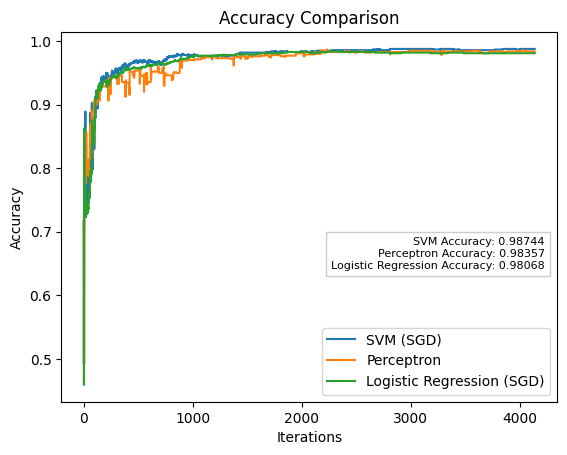

In [22]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import HashingVectorizer

hashing_vectorizer = HashingVectorizer(stop_words='english')

X = hashing_vectorizer.fit_transform(df['text'])
y = df['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
svm_classifier = SGDClassifier(loss='hinge', alpha=0.0001, max_iter=100, random_state=42)
log_regression_model = SGDClassifier(loss='log_loss')
perceptron_model = Perceptron()

# Train and evaluate models
svm_accuracy = []
perceptron_accuracy = []
log_model_accuracy = []

for i in range(1, X_train.shape[0]):
    svm_classifier.partial_fit(X_train[:i],  y_train[:i], classes=np.unique(y))
    svm_pred = svm_classifier.predict(X_test)
    svm_accuracy.append(accuracy_score(y_test, svm_pred))
    
    perceptron_model.partial_fit(X_train[:i], y_train[:i], classes=np.unique(y))
    perceptron_pred = perceptron_model.predict(X_test)
    perceptron_accuracy.append(accuracy_score(y_test, perceptron_pred))
    
    log_regression_model.partial_fit(X_train[:i], y_train[:i], classes=np.unique(y))
    log_regression_model_pred = log_regression_model.predict(X_test)
    log_model_accuracy.append(accuracy_score(y_test, log_regression_model_pred))
    
    
    sys.stdout.write("\rTraining progress: {}/{} points processed".format(i+1, X_train.shape[0]))
    sys.stdout.flush()

# Plot accuracy over iterations
plt.plot(range(1, X_train.shape[0]), svm_accuracy, label='SVM (SGD)')
plt.plot(range(1, X_train.shape[0]), perceptron_accuracy, label='Perceptron')
plt.plot(range(1, X_train.shape[0]), log_model_accuracy, label='Logistic Regression (SGD)')

final_accuracy_text = f"SVM Accuracy: {svm_accuracy[-1]:.5f}\nPerceptron Accuracy: {perceptron_accuracy[-1]:.5f}\nLogistic Regression Accuracy: {log_model_accuracy[-1]:.5f}"
plt.text(0.975, 0.4, final_accuracy_text, transform=plt.gca().transAxes, fontsize=8, verticalalignment='center', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend()
plt.show()

### Confusion Matrix Comparision

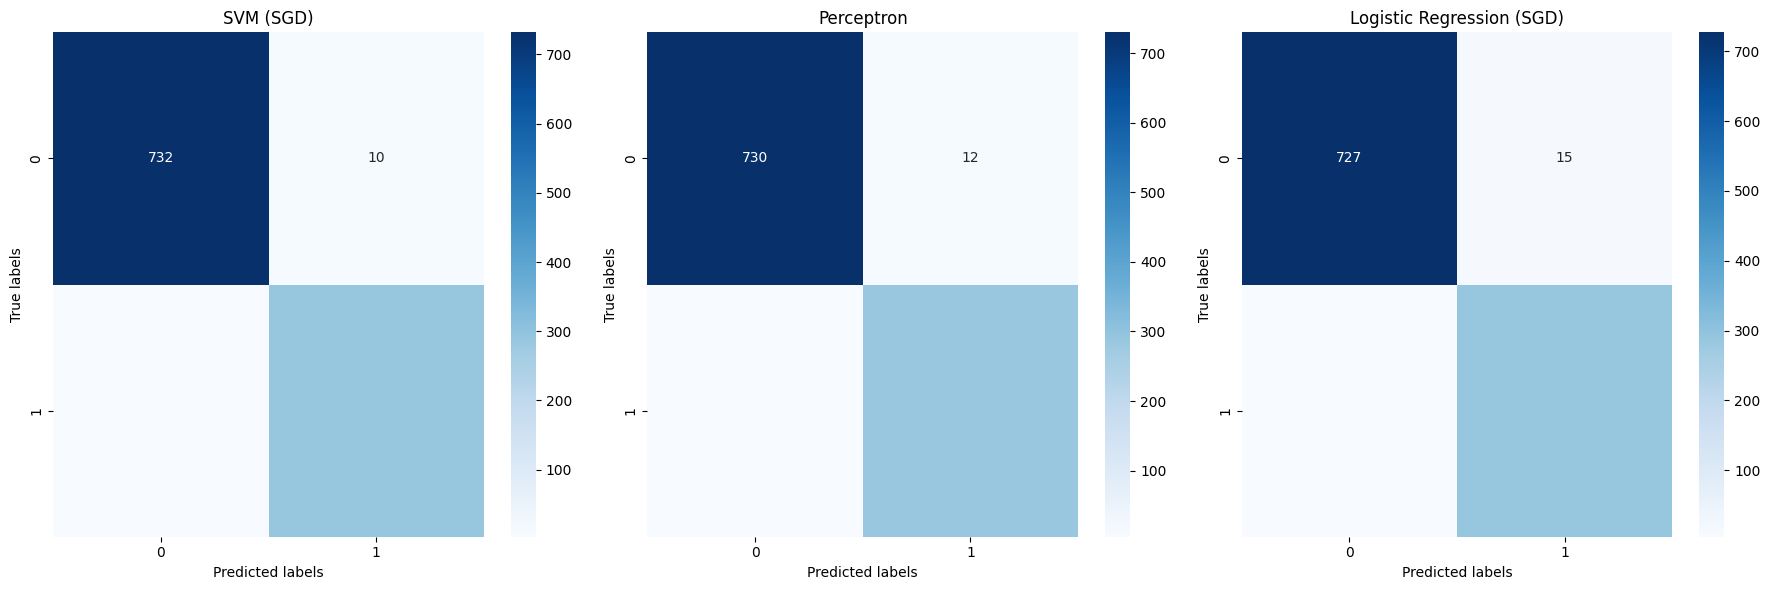

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrices for each model
conf_mat_svm = confusion_matrix(y_test, svm_pred)
conf_mat_perceptron = confusion_matrix(y_test, perceptron_pred)
conf_mat_log_regression = confusion_matrix(y_test, log_regression_model_pred)

# Create subplots for each confusion matrix
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot confusion matrix heatmap for SVM (SGD)
sns.heatmap(conf_mat_svm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')
axes[0].set_title('SVM (SGD)')

# Plot confusion matrix heatmap for Perceptron
sns.heatmap(conf_mat_perceptron, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')
axes[1].set_title('Perceptron')

# Plot confusion matrix heatmap for Logistic Regression (SGD)
sns.heatmap(conf_mat_log_regression, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_xlabel('Predicted labels')
axes[2].set_ylabel('True labels')
axes[2].set_title('Logistic Regression (SGD)')

plt.tight_layout()
plt.show()


### Learning Curve

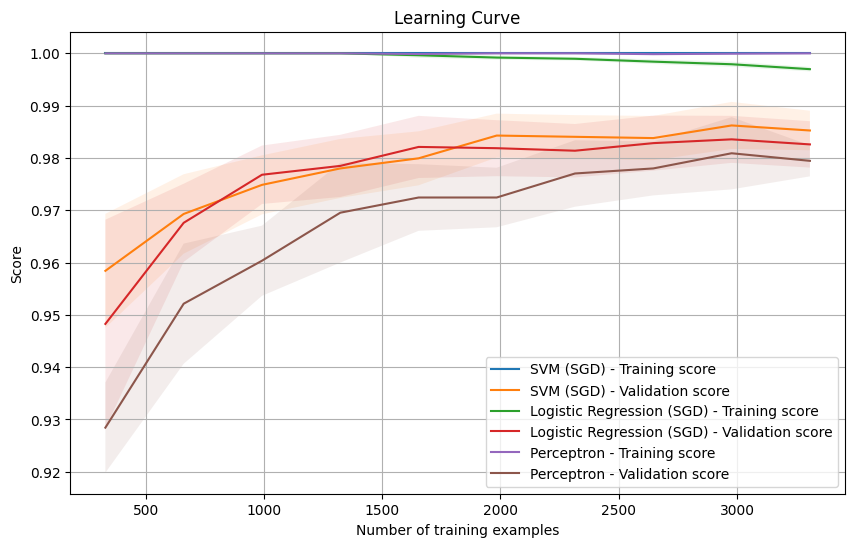

In [25]:
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimators, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5):
    plt.figure(figsize=(10, 6))
    for name, estimator in estimators.items():
        train_sizes, train_scores, validation_scores = learning_curve(estimator, X, y, train_sizes=train_sizes, cv=cv)
        
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        validation_mean = np.mean(validation_scores, axis=1)
        validation_std = np.std(validation_scores, axis=1)
        
        plt.plot(train_sizes, train_mean, label=f'{name} - Training score')
        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
        plt.plot(train_sizes, validation_mean, label=f'{name} - Validation score')
        plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.1)
    
    plt.title('Learning Curve')
    plt.xlabel('Number of training examples')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define models
estimators = {
    "SVM (SGD)": svm_classifier,
    "Logistic Regression (SGD)": log_regression_model,
    "Perceptron": perceptron_model
}

# Plot learning curves for all models
plot_learning_curve(estimators, X_train, y_train)
